## 02. Graphical Analysis

In [1]:
/* Import dataset */
proc import 
    datafile='/home/u43674369/projects/project01/placement_data.csv' 
    out=df dbms=csv replace;
run;

/* Replace missing values with 0 */
proc stdize data=df
    out=df
    reponly missing=0;
run;

Error trying to read authinfo file:C:\Users\james\_authinfo
[Errno 2] No such file or directory: 'C:\\Users\\james\\_authinfo'
Did not find key oda in authinfo file:C:\Users\james\_authinfo

Please enter the IOM user id: james.ssjeong@gmail.com
Please enter the password for IOM user : ········
SAS Connection established. Subprocess id is 10624

7                                                          The SAS System                      Sunday, November  1, 2020 03:51:00 PM

34         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
34       ! ods graphics on / outputfmt=png;
35         
36         /* Import dataset */
37         proc import
38             datafile='/home/u43674369/projects/project01/placement_data.csv'
39             out=df dbms=csv replace;
40         run;
NOTE: Unable to open parameter catalog: SASUSER.PARMS.PARMS.SLIST in update mode. Temporary parameter values will be saved to 
WORK.PARMS.PAR


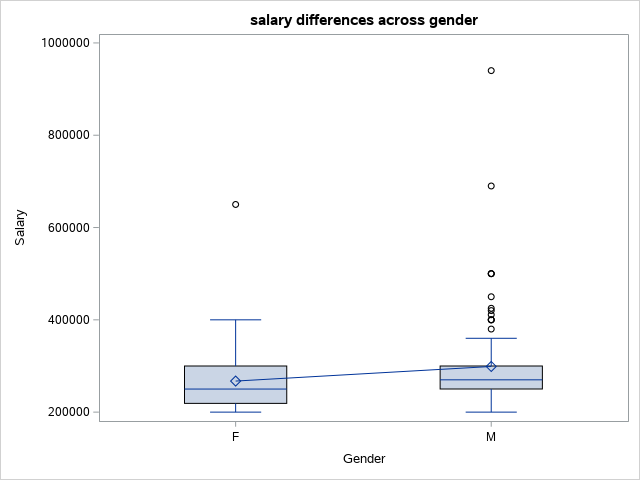
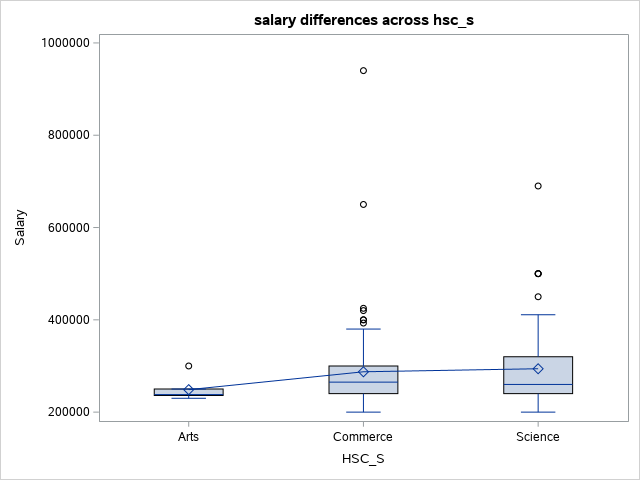
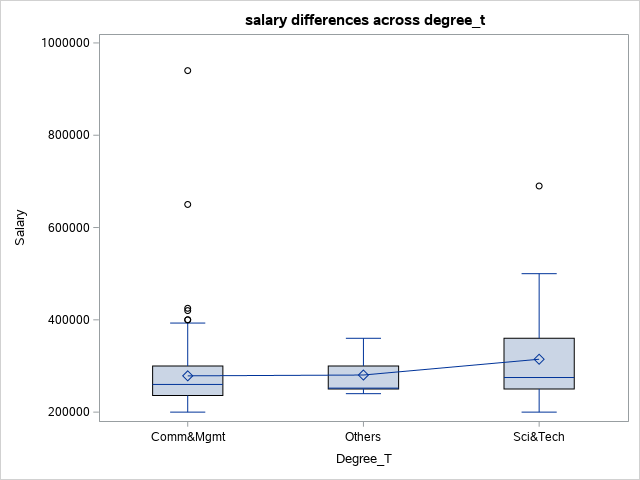
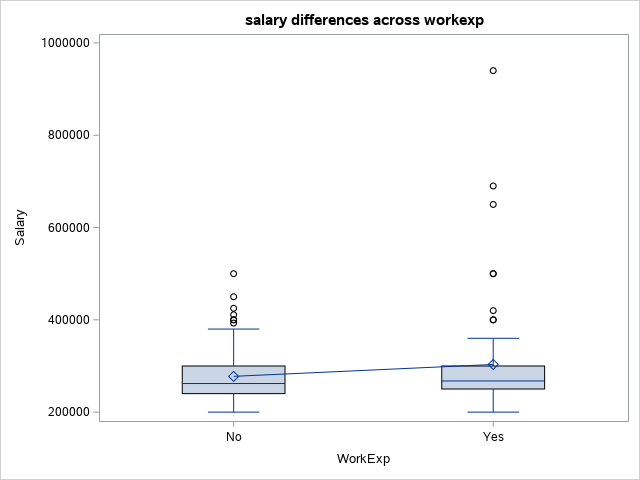
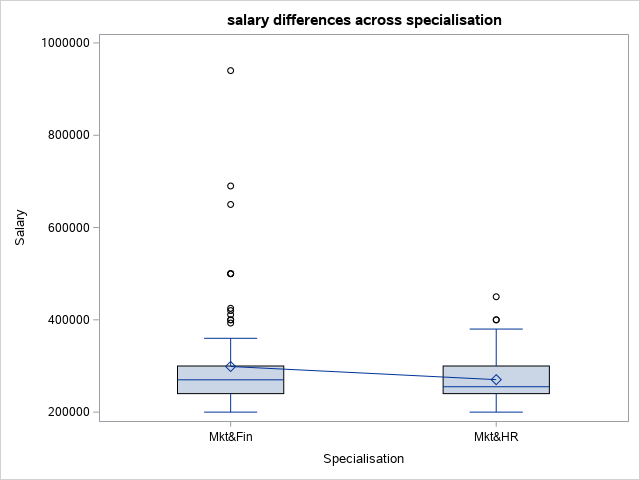

In [2]:
/* Identify associations in ANOVA with boxplots */
/* Between salary and other categorcial variables */
/* macro for graphical analysis connecting means */
/* Part A */

%let categorical = gender hsc_s degree_t workexp specialisation;

%macro box(response=, regressor=);

%let i = 1;

%do %while(%scan(&regressor,&i,%str( )) ^= %str());

    %let var = %scan(&regressor,&i,%str( ));
    
	proc sgplot data = df;
        where salary ne 0;
		vbox &response / category = &var connect = mean;
		title "&response differences across &var";
    
    %let i = %eval(&i + 1);

%end;

run;
quit;
title;

%mend box;
%box(response=salary, regressor=&categorical);


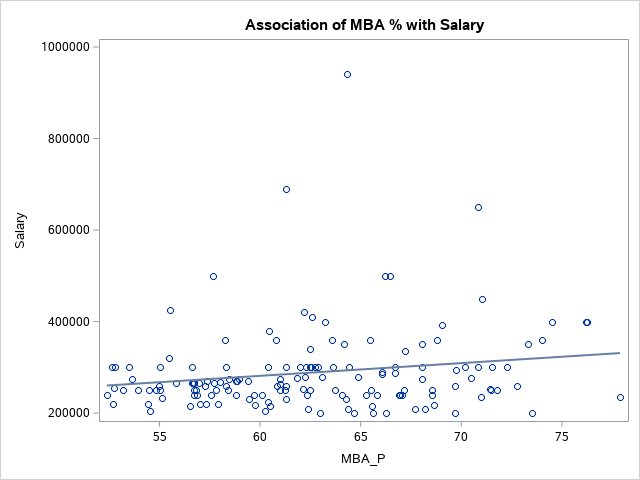
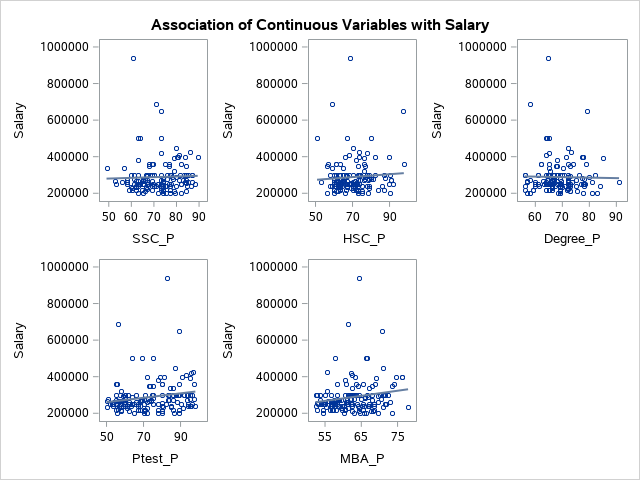

In [3]:
/*identify associations in linear regression with scatter plots */
/* between salary and other continuous variables */
/* macro for graphical analysis */
/* Part B */

proc sgscatter data=df;
    where salary ne 0;
	plot salary*mba_p / reg;
	title "Association of MBA % with Salary";
run;
title;


%let factor2 = ssc_p hsc_p degree_P ptest_p mba_p;

proc sgscatter data=df;
    where salary ne 0;
	plot salary*(&factor2) / reg;
	title "Association of Continuous Variables with Salary";
run;
title;